In [ ]:
import numpy as np
import cv2
import os

importanto as bibliotecas necessárias para o funcionamento do código.



In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Arquivo carregador("name") com tamanho de (length) bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ursos.PNG to ursos.PNG
Arquivo carregador("name") com tamanho de (length) bytes


aqui importa a imagem diretamente do google colab.

In [ ]:
filename = next(iter(uploaded))
print(filename)

ursos.PNG


aqui guarda a imagem e mostra o nome dela.

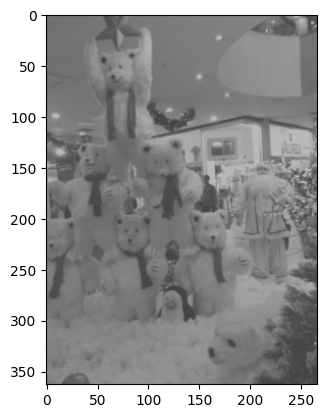

In [ ]:
from matplotlib import pyplot as plt
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap='gray')

aqui apresenta a imagem original

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img1 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-2):
  for b in range(0,y-2):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*1, img[a+1,b+1,c]*1]
      roberts = img_vetor[0] - img_vetor[3]
      if roberts < 0:
        roberts = -roberts

      img1[a,b] = roberts

aqui é aplicado o filtro de roberts, onde ele aplica o foco em uma diagonal, utilizando 4 pixels, contornando as linhas da imagem

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img2 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*1, img[a+1,b+1,c]*1]
      roberts = img_vetor[1] - img_vetor[2]
      if roberts < 0:
        roberts = -roberts

      img2[a,b] = roberts

aqui é aplicado o filtro de roberts também, só que em outra diagonal,
também contornando as linhas da imagem.

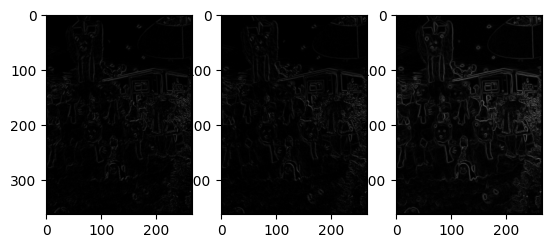

In [ ]:
img3 = img1 + img2

plt.subplot(1,3,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)

aqui as duas imagens com os dois efeitos, e a última sendo a junção deles.

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img4 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*1, img[a+1,b+1,c]*1, img[a-1,b,c]*1, img[a,b-1,c]*1, img[a-1,b-1,c]*1, img[a+1,b-1,c]*1, img[a-1,b+1,c]*1]

      soma = img_vetor[0] + img_vetor[1] + img_vetor[2]
      sub = img_vetor[6] + img_vetor[7] + img_vetor[8]

      prewitt = soma - sub
      if prewitt < 0:
        prewitt = -prewitt

      img4[a,b] = prewitt

aqui é aplicado o filtro de prewitt, onde as linhas são traçadas usando uma escala de 9 pixels, assim capturando melhor as bordas.

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img5 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*1, img[a+1,b+1,c]*1, img[a-1,b,c]*1, img[a,b-1,c]*1, img[a-1,b-1,c]*1, img[a+1,b-1,c]*1, img[a-1,b+1,c]*1]

      soma = img_vetor[0] + img_vetor[3] + img_vetor[6]
      sub = img_vetor[2] + img_vetor[5] + img_vetor[8]

      prewitt = soma - sub
      if prewitt < 0:
        prewitt = -prewitt

      img5[a,b] = prewitt

aqui é aplicado o filtro de prewitt também, só que em outra diagonal.

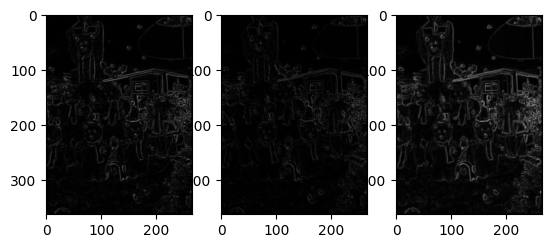

In [ ]:
img6 = img4 + img5

plt.subplot(1,3,1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(img6, cmap='gray', vmin=0, vmax=255)

aqui mostra o resultado da primeira e segunda imagem, e a terceira, sendo a junção das outras 2.

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img7 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*2, img[a,b+1,c]*1, img[a+1,b+1,c]*1, img[a-1,b,c]*2, img[a,b-1,c]*1, img[a-1,b-1,c]*1, img[a+1,b-1,c]*1, img[a-1,b+1,c]*1]

      soma = img_vetor[0] + img_vetor[3] + img_vetor[6]
      sub = img_vetor[2] + img_vetor[5] + img_vetor[8]

      sobel = soma - sub
      if sobel < 0:
        sobel = -sobel

      img7[a,b] = sobel

aqui é aplicado o filtro sobel, onde também é utilizada uma escala de 9 pixels, mas o pixel do meio da primeira e da ultima fileira tem o seu valor multiplicado por 2.

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img8 = np.zeros((x,y), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*2, img[a+1,b+1,c]*1, img[a-1,b,c]*1, img[a,b-1,c]*2, img[a-1,b-1,c]*1, img[a+1,b-1,c]*1, img[a-1,b+1,c]*1]

      soma = img_vetor[0] + img_vetor[3] + img_vetor[6]
      sub = img_vetor[2] + img_vetor[5] + img_vetor[8]

      sobel = soma - sub
      if sobel < 0:
        sobel = -sobel

      img8[a,b] = sobel

aqui é a mesma coisa em outra diagonal.

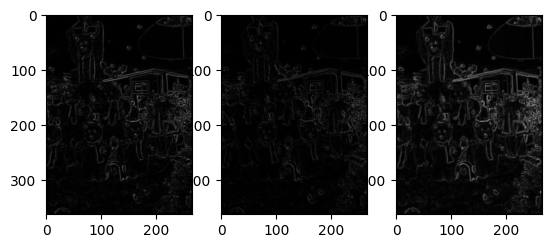

In [ ]:
img9 = img7 + img8

plt.subplot(1,3,1)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(img5, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(img6, cmap='gray', vmin=0, vmax=255)

aqui é apresentada as 3 imagens, sendo a 3 a soma das outras duas.

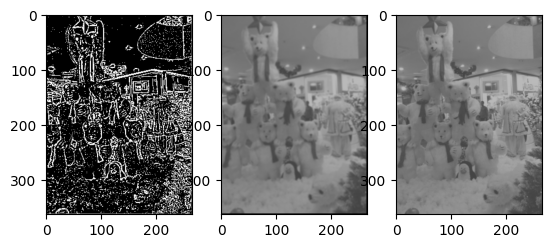

In [ ]:
x = img.shape [0]
y = img.shape [1]
z = img.shape [2]

img10 = np.zeros((x,y,z), dtype = np.uint8)

for a in range(0,x-1):
  for b in range(0,y-1):
    for c in range(0,z):
      img_vetor = [img[a,b,c]*1, img[a+1,b,c]*1, img[a,b+1,c]*1, img[a+1,b+1,c]*1, img[a-1,b,c]*1, img[a,b-1,c]*1, img[a-1,b-1,c]*1, img[a+1,b-1,c]*1, img[a-1,b+1,c]*1]

      soma = 0
      for i in range(0,9):
        soma = soma + img_vetor[i]

      media = soma//9

      img10[a,b] = media

      img_passa_alta = img - img10

plt.subplot(1,3,1)
plt.imshow(img_passa_alta, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(img10, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

aqui é aplicado o filtro passa alta, onde são somados 9 pixels da imagem e depois é feito a média entre eles, essa média gera uma imagem, onde é subtraída pela imagem original, dando o resultado do filtro passa alta.
a primeira imagem é o filtro passa alta, a segunda o filtro de média, e a terceira a original.